# Object Detection in Football videos - Project Checkpoint 1
# Classes:
1) Player
2) Referee
3) Ball

# Downloading the dataset

In [1]:
from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./")
mySoccerNetDownloader.downloadDataTask(task="tracking", split=["train"])

# Import necessary libraries

In [23]:
import pandas as pd
import os
import shutil

# Extracting only subset of data for our use

In [28]:
directory = r'tracking/train/train/'
subset_data_paths = []
interval = 60

for clip_name in os.listdir(directory):
    sub_directory = directory + clip_name + '/img1'
    sorted_directory_list = sorted(os.listdir(sub_directory), key= lambda x: x.split(".")[0])
    for i in range(len(sorted_directory_list)):
        if i % interval == 0:
            subset_data_paths.append((sub_directory+'/'+ sorted_directory_list[i],clip_name+sorted_directory_list[i]))

In [30]:
destination_directory = r'dataset'
for original_path, new_name in subset_data_paths:
    if os.path.isfile(original_path):
        shutil.copy(original_path, os.path.join(destination_directory, new_name))

# Subset Considered for this project

In [32]:
print("Number of images taken considered for the project: ",len(os.listdir(destination_directory)),"images")

Number of images taken considered for the project:  741 images


# Data Pre-processing

For creating the yaml and txt files for the annotations of the dataset, i have used an online platform called "ROBOFLOW". Its a free version which was used. Out of 741 images, I have only manually annotated 235 images to check if this is enough. It also split dataset into train,validation and test. I have also done the following pre-processing steps on roboflow:
1) Resized image sizes to 640x640.
2) Data augmentation involving Random Gaussian blur of between 0 and 1.1 pixels which increased the dataset size to 573 images.
3) I have also exported the dataset in the format of yolov7 which i will be going to use

In [52]:
yolov8_dataset = r'dataset_yolov8'
for file in os.listdir(yolov8_dataset):
        if len(file.split(".")) < 2:
            print(f"Directory: {file}")
        else:
            print(f"File: {file}")

File: data.yaml
File: README.dataset.txt
File: README.roboflow.txt
Directory: test
Directory: train
Directory: valid


In [53]:
test_images = len(os.listdir(yolov8_dataset+"/test/images"))
train_images = len(os.listdir(yolov8_dataset+"/train/images"))
validation_images = len(os.listdir(yolov8_dataset+"/valid/images"))
print("Full dataset Size : ", train_images+test_images+validation_images)
print("Training Set Size : ", train_images)
print("Validation Set Size : ", validation_images)
print("Test Set Size : ", test_images)

Full dataset Size :  573
Training Set Size :  521
Validation Set Size :  26
Test Set Size :  26


# I have considered three classes: Player, Referee and ball

# Initialize Yolov8 model

In [54]:
!pip install ultralytics

     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ---------------------------------------- 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/780.6 kB ? eta -:--:--
   ------------ --------------------------- 235.5/780.6 kB 7.3 MB/s eta 0:00:01
   --------------------------------------  778.2/780.6 kB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 780.6/780.6 kB 9.9 MB/s eta 0:00:00


In [56]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 7.47MB/s]


In [57]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

# Test sample image with Yolov8 pre-trained to check the impact of training later 

In [58]:
results = model(source = "test.jpg", show = True, conf = 0.4,save = True)


image 1/1 C:\Users\abhip\Deep Learning\Project\test.jpg: 384x640 19 persons, 1 sports ball, 453.2ms
Speed: 31.3ms preprocess, 453.2ms inference, 31.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


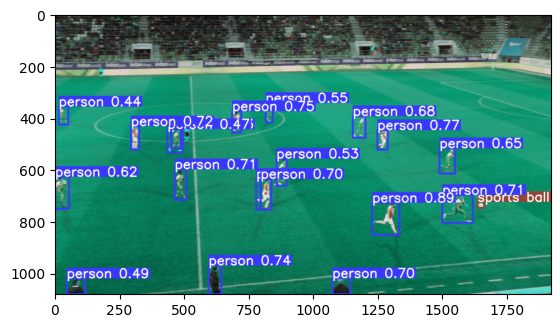

In [62]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread(r'runs\detect\predict\test.jpg',1)
plt.imshow(image)

# As you can see it does a good job but we only have to detect players on the field not outside. Our data is ready now! Next step is training!